# Linear regression 

In [1]:
# Dataset downloaded from  https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

In [2]:
# Import the required packages
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn.linear_model import LinearRegression # for using the model
from sklearn import metrics
# import matplotlib.pyplot as plt # for plotting

In [6]:
#### Let's consider a dataset
bmi=pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
bmi=bmi.loc[bmi['Index']==2] # Let's consider data whose index is 2.
bmi.head()

,Gender,Height,Weight,Index
1,Male,189,87,2
10,Male,195,81,2
13,Male,155,51,2
14,Male,191,79,2
24,Female,172,67,2


In [4]:
bmi.describe()

,Height,Weight,Index
count,69.000000,69.000000,69.0
mean,174.260870,69.086957,2.0
std,13.786878,12.062020,0.0
min,148.000000,50.000000,2.0
25%,163.000000,59.000000,2.0
50%,177.000000,68.000000,2.0
75%,185.000000,79.000000,2.0
max,199.000000,99.000000,2.0


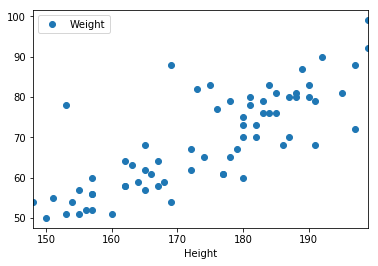

In [5]:
bmi.plot(x='Height',y='Weight',style='o')

    Note that, the column values are in the form of series. But a model expect the values in the form of numpy array. So, we should convert the data into [n,1] array( n rows and 1 column )
    
    Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown . So we get result new shape as 2 dimentions.

In [6]:
x=bmi['Height'].values.reshape(-1,1)
y=bmi['Weight'].values.reshape(-1,1)

In [7]:
# Now divide the data into train and test. Here we are keeping 20% as our test set
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [8]:
# Now apply linear regression model on training dataset
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### In y=mx+c, we know that c is intercept and m is slope.

In [9]:
print(model.intercept_)  # This is our 'c'

[-52.19946658]


In [10]:
print(model.coef_) # This is our 'm'

[[0.69650554]]


### Now we apply the model on testset.

In [11]:
predicted_weight=model.predict(X_test) 
predicted_weight

array([[67.5994864 ],
       [62.72394762],
       [57.15190329],
       [65.50996978],
       [81.52959721],
       [78.74357505],
       [64.81346424],
       [73.86803627],
       [75.26104735],
       [54.36588113],
       [59.24141991],
       [71.0820141 ],
       [71.0820141 ],
       [78.04706951]])

### Now, let's make a dataframe with actual values and predicted values

In [12]:
Actual_predicted=pd.DataFrame({'predicted':predicted_weight.flatten(), 'Actual':Y_test.flatten()})
Actual_predicted

,predicted,Actual
0,67.599486,62
1,62.723948,68
2,57.151903,60
3,65.509970,88
4,81.529597,90
5,78.743575,80
6,64.813464,59
7,73.868036,78
8,75.261047,76
9,54.365881,51


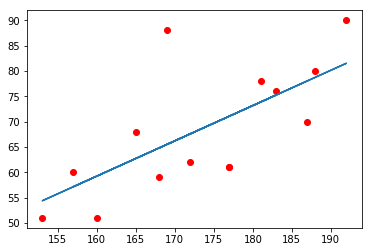

In [13]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,predicted_weight)

In [15]:
print('R2 error:',metrics.r2_score(Y_test, predicted_weight))

R2 error: 0.4907584843193443
